# Project  ~  Bank Loan

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.ap-southeast-1.amazonaws.com/images.asianage.com/images/aa-Cover-duc2lce1dduh1qm0bg2vlts690-20180226061846.Medi.jpeg")

In [2]:
#loading libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,make_scorer,classification_report



In [3]:
#load the data
loan = pd.read_csv('C:/python/bank-loan.csv' )

In [4]:
#look at the data
loan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
#number of rows and columns
loan.shape

(850, 9)

In [6]:
#datatypes of the data
loan.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [7]:
loan['ed'].value_counts()

1    460
2    235
3    101
4     49
5      5
Name: ed, dtype: int64

In [14]:
#converting datatype
loan['default'] = loan['default'].astype(object)
loan['ed'] = loan['ed'].astype(object)


In [8]:
#descriptive statistics
loan.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


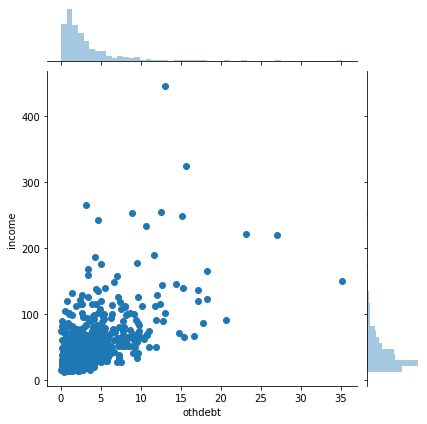

In [9]:
#scatterplot
sns.jointplot(loan['othdebt'] , loan['income'])


### We can see the positive relationship between variables

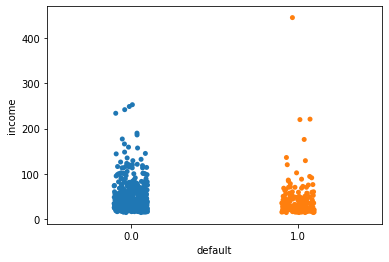

In [10]:
#stripplot
sns.stripplot(loan['default'], loan['income'], jitter=True)


# Data Pre-Processing

###  Missing Value Analysis

In [11]:
#checking missing-value
loan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [12]:
#remove missing value
loan.dropna(inplace = True)

# Outlier Analysis

In [13]:
#select only numeric
cnames = loan.select_dtypes(include=np.number)

In [15]:
cnames = cnames.drop(['ed','default'],axis = 1)

### Box-Plot



In [16]:
def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(7,1,figsize=(11,17))

    for feature in features:
        i += 1
        plt.subplot(7,1,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

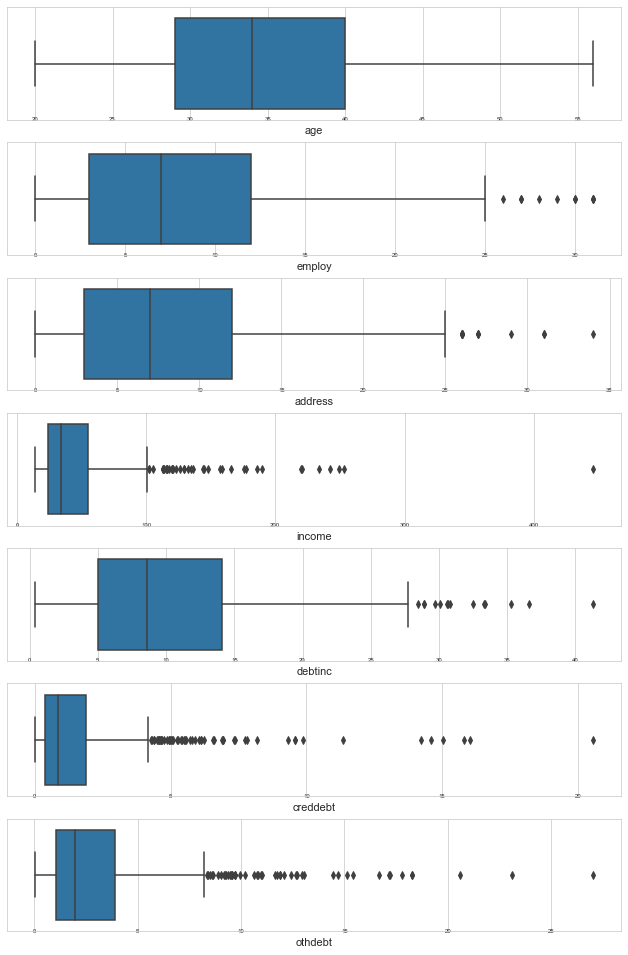

In [17]:
features = cnames
plot_feature_boxplot(loan, features)


In [18]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(loan.loc[:,i], [75,25])
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
 
    loan[i].loc[loan[i]> max] = np.nan
    loan[i].loc[loan[i]< min] = np.nan   

age
12.5
56.5
employ
-10.5
25.5
address
-10.5
25.5
income
-22.5
101.5
debtinc
-8.6875
27.8125
creddebt
-1.930284375
4.201298625
othdebt
-3.2741515000000003
8.2413945


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
#imputing outliers with median
loan['employ'] = loan['employ'].fillna(loan['employ'].median())
loan['address'] = loan['address'].fillna(loan['address'].median())
loan['income'] = loan['income'].fillna(loan['income'].median())
loan['debtinc'] = loan['debtinc'].fillna(loan['debtinc'].median())
loan['creddebt'] = loan['creddebt'].fillna(loan['creddebt'].median())
loan['othdebt'] = loan['othdebt'].fillna(loan['othdebt'].median())


In [22]:
loan.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

# Feature Selection

### 1. Heatmap

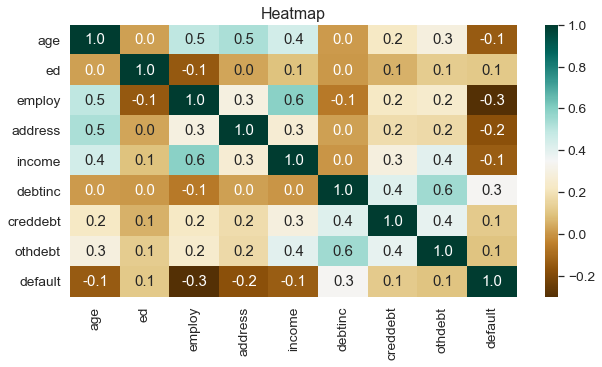

In [28]:
corr = loan.corr()
f,ax = plt.subplots(figsize=(10, 5))
plt.title('Heatmap',y = 1 , size = 16)
sns.heatmap(loan.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

### Here, no strong co-relation present between variables

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BE908D0>,
      dtype=object)

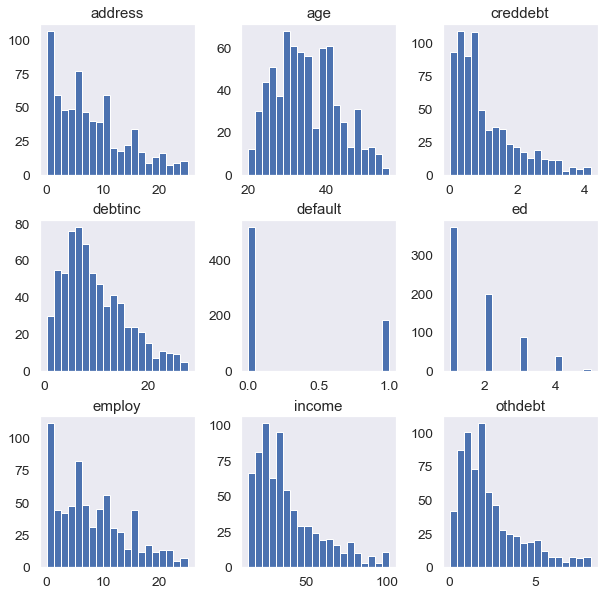

In [29]:
loan.hist(grid = False,figsize =(10,10),bins=20 )

### not normally distributed so we need to scale the data

In [31]:
#normalisation
for i in cnames:
    print(i)
    loan[i] = (loan[i] - (loan[i].min()))/((loan[i].max()) - (loan[i].min()))


age
employ
address
income
debtinc
creddebt
othdebt


# Model Development

In [34]:
loan['default'] = loan['default'].astype(int)

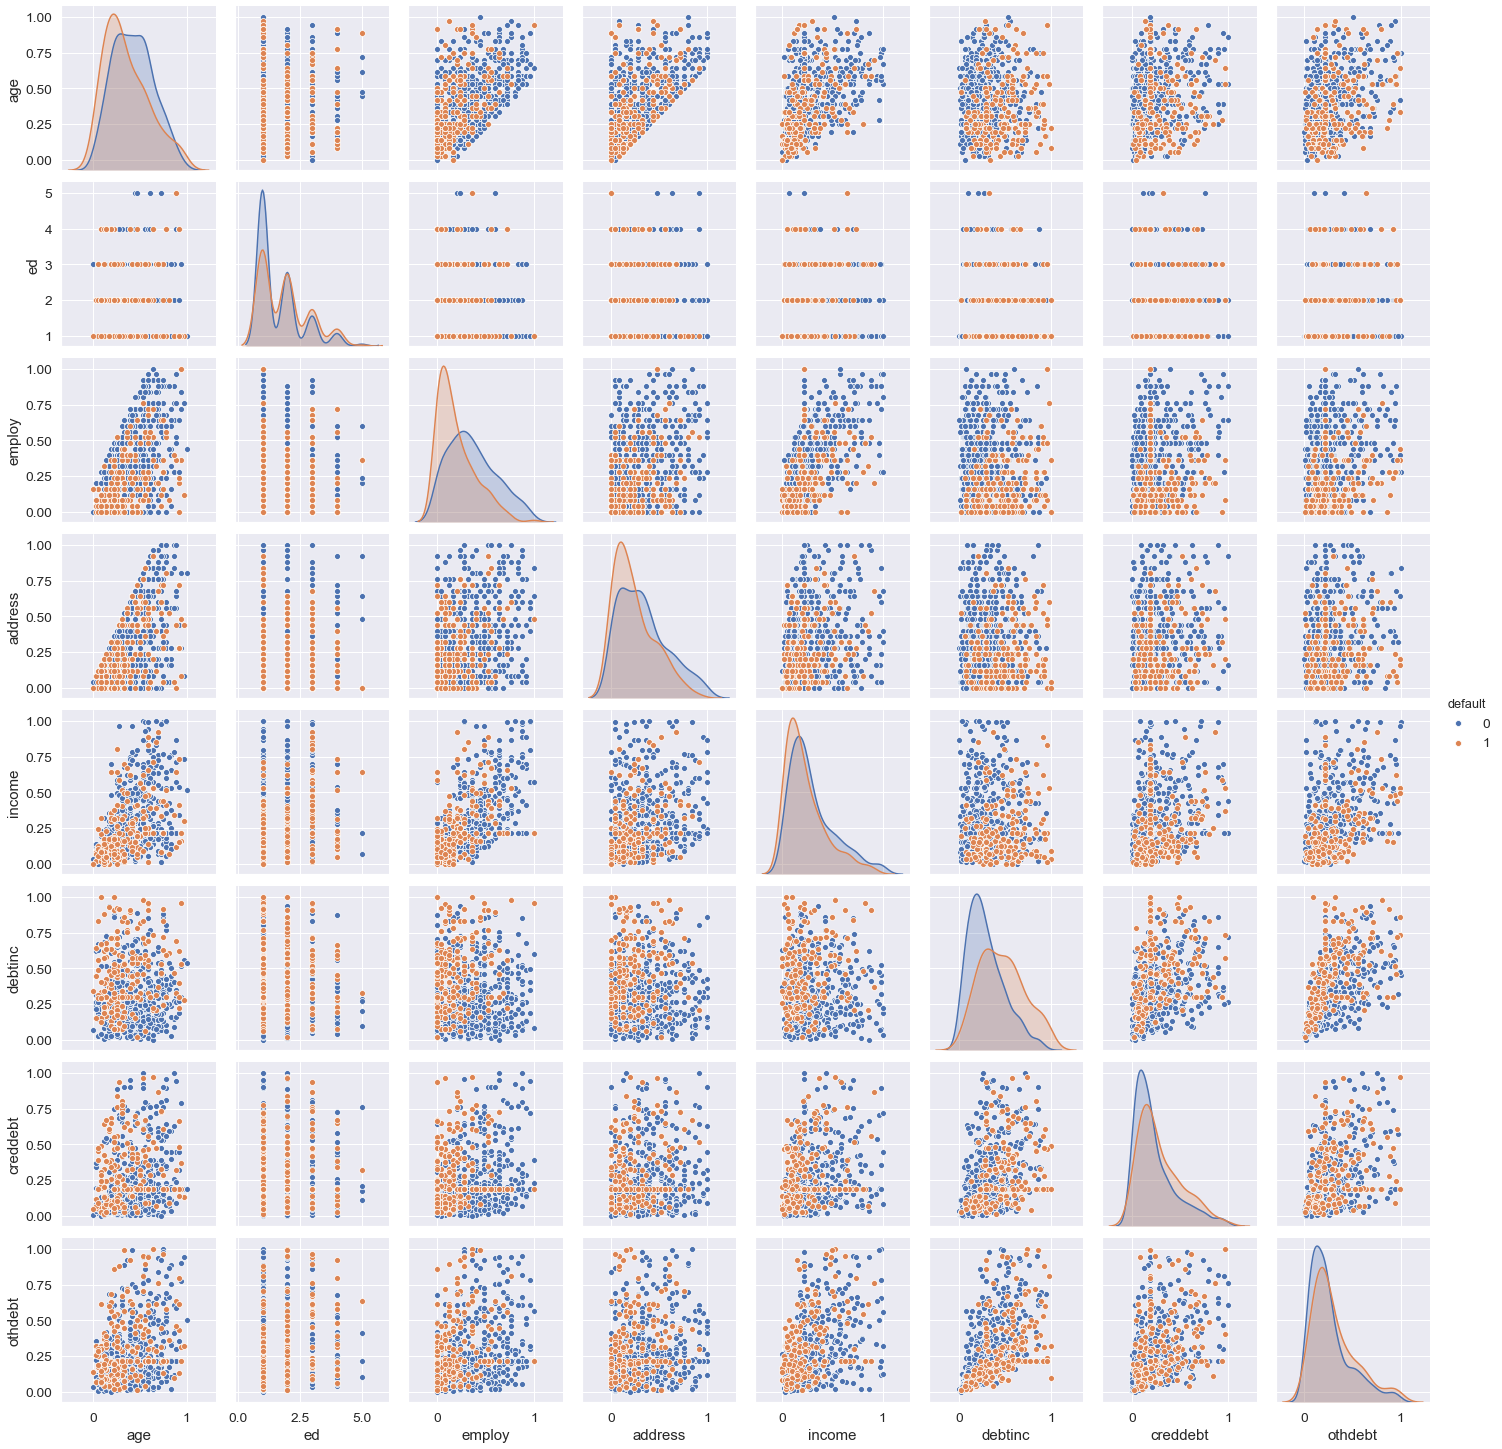

In [62]:
#pairplot
sns.pairplot(loan ,hue = 'default',diag_kind='kde')

In [33]:
#loan['default'] = loan['default'].replace(1,'Defaulted')
#loan['default'] = loan['default'].replace(0,'Non-defaulted')

In [35]:
X = loan.drop('default',axis = 1)
y = loan['default']

### Train-Test Split

In [138]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state =2194)

### Random Forest

In [139]:
rf = RandomForestClassifier(n_estimators =200).fit(X_train , y_train)

In [140]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [141]:
rf_pred = rf.predict(X_test)

In [142]:
#accuracy
accuracy_score(y_test , rf_pred) *100   

75.71428571428571

In [143]:
CM = pd.crosstab(y_test, rf_pred)
CM

col_0,0,1
default,,
0,92,9
1,25,14


In [145]:
FNR = 25/(25+14)*100
FNR

64.1025641025641

In [146]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestClassifier(random_state = 21)
n_estimator = list(range(100,200,10))
depth = list(range(3,6,1))
#min_samples_split = list(range(2,6,1))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#accuracy
GRF_r2 = accuracy_score(y_test, predictions_GRF)

print('Grid Search CV Random Forest Regressor Model Performance: \n')
print('Best Parameters = ',view_best_params_GRF)
print(pd.crosstab(y_test,predictions_GRF))
print('accuracy = ', GRF_r2)


Grid Search CV Random Forest Regressor Model Performance: 

Best Parameters =  {'max_depth': 5, 'n_estimators': 170}
col_0     0   1
default        
0        95   6
1        27  12
accuracy =  0.7642857142857142


In [148]:
FNR = 27/(27+12)*100
FNR

69.23076923076923